# **Importing libraries**

In [352]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading the data**

In [353]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)

(7043, 21)


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [355]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [356]:
df["PaymentMethod"].value_counts() # one hot 


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [357]:
df["Contract"].value_counts() # one hot 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [358]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [359]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [360]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [361]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [362]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [363]:
df["OnlineSecurity"].value_counts() # Note

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [364]:
df["InternetService"].value_counts() # one hot

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [365]:
df["MultipleLines"].value_counts() # Need Check

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

## **Data Cleaning**

In [366]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [368]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [369]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [370]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [371]:
# Check for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [372]:
#drop 11 null values from TotalCharges column
df.dropna(inplace = True)

In [373]:
# drop customerID column 
#df.drop(columns= "customerID", inplace = True)

# **EDA**

### **How many customers have churned and what is the churn rate?**

In [374]:
churn = df['Churn'].value_counts()
print(churn)

No     5163
Yes    1869
Name: Churn, dtype: int64


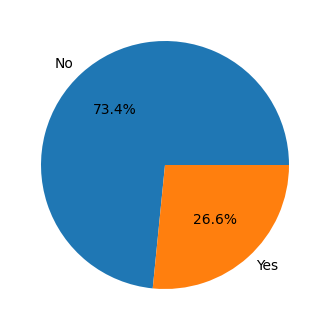

In [375]:
# Create a pie chart for churn column
plt.figure(figsize=(4, 6))
my_palette = ['#1f77b4', '#ff7f0e']
plt.pie(churn,colors = my_palette,labels = churn.index, autopct= '%1.1f%%');

### **How many Males and Females ?**

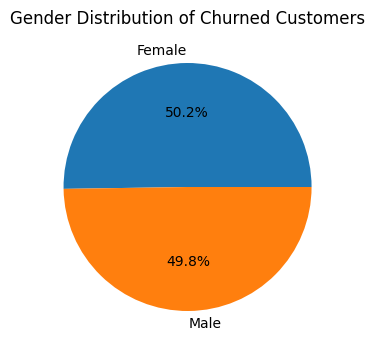

In [376]:
churned_customers = df[df['Churn'] == 'Yes']
# Count the gender distribution for churned customers
gender_counts = churned_customers['gender'].value_counts()

# Create a pie chart for the gender distribution of churned customers
my_palette = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(4, 6))
plt.pie(gender_counts, colors=my_palette, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution of Churned Customers")
plt.show()


#### **They are approximately equal.**

### **What are the demographics of the customers who have churned?**

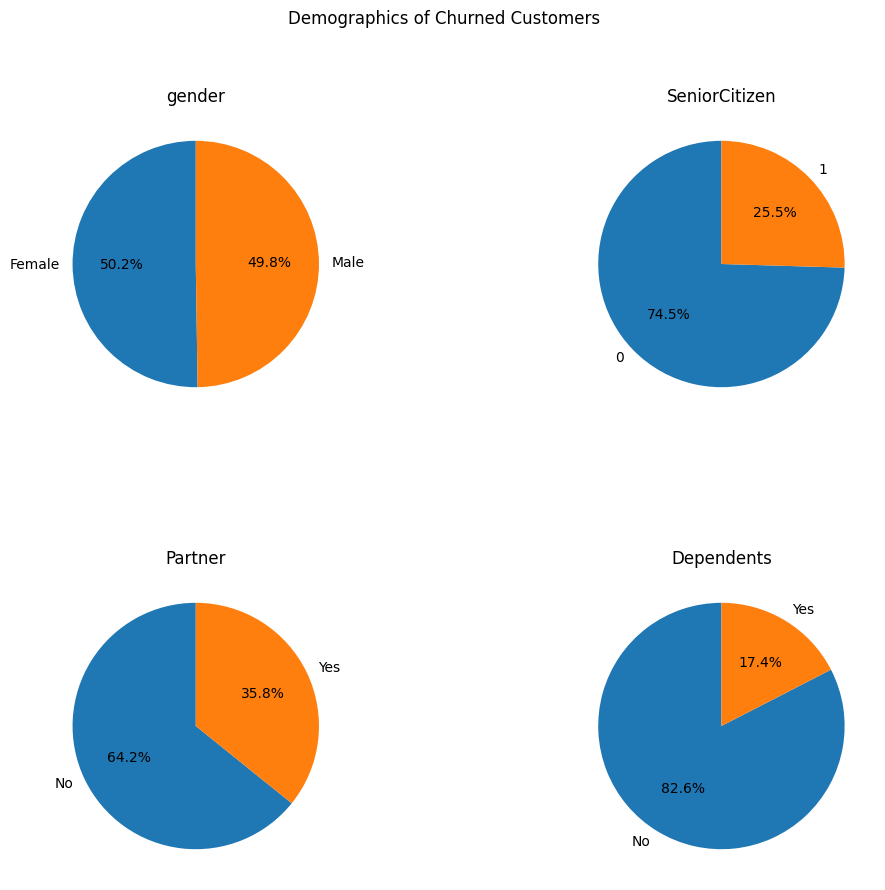

In [377]:
# Define the demographic variables to plot
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop through the demographic variables and create a pie chart for each
for i, var in enumerate(demographic_vars):
    row = i // 2
    col = i % 2
    
    # Group the churned customers by the demographic variable
    demographic_counts = df[df['Churn'] == 'Yes'][var].value_counts()
    
    # Create a pie chart for the variable
    axs[row][col].pie(demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%', startangle=90, colors =['#1f77b4', '#ff7f0e'])
    axs[row][col].set_title(var)

# Set the title for the entire figure
fig.suptitle('Demographics of Churned Customers')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()


- **Gender doesn't make a difference in people leaving our company.**
- **Seniors like our company; a quarter of those who left were seniors.**
- **People with partners are less likely to leave; only 35.8% of those who left had partners.**
- **Most (82.6%) of those who left didn't have dependents; customers with dependents tend to stay.**

### **Are there any differences in churn rate between customers with partners and those without?**

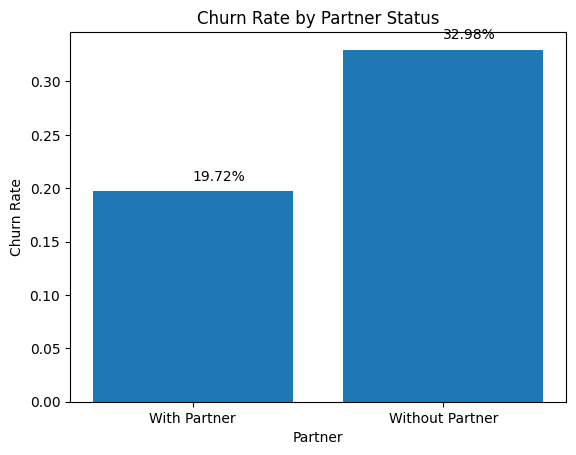

In [378]:
# Calculate the churn rate for customers with partners
with_partner = df[df['Partner'] == 'Yes']
with_partner_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_partner = df[df['Partner'] == 'No']
without_partner_churn_rate = without_partner['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With Partner', 'Without Partner'], [with_partner_churn_rate, without_partner_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Partner Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_partner_churn_rate, without_partner_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()


* #### **The churn rate for customers without partner is 32.98% (greater than overall churn rate)**
* #### **The churn rate for customers with partner is 19.72% (smaller than overall churn rate)**

### **What about Dependents ?**

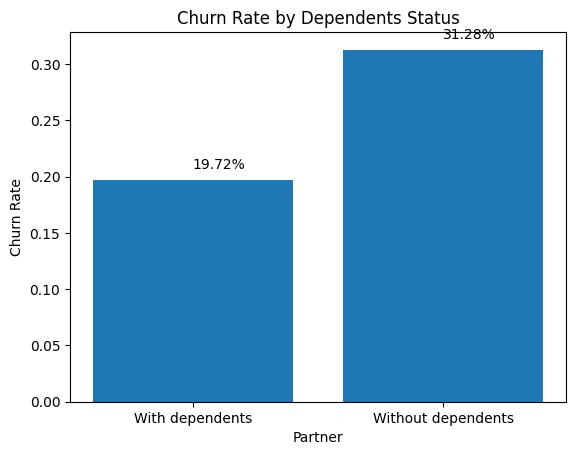

In [379]:
# Calculate the churn rate for customers with partners
with_dependents = df[df['Dependents'] == 'Yes']
with_dependents_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_dependents = df[df['Dependents'] == 'No']
without_dependents_churn_rate = without_dependents['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With dependents', 'Without dependents'], [with_dependents_churn_rate, without_dependents_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Dependents Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_dependents_churn_rate, without_dependents_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()


* #### **The churn rate for customers without Dependents is 31.28% (greater than overall churn rate)**
* #### **The churn rate for customers with partner is 19.72% (smaller than overall churn rate)**

In [380]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [381]:
""" services = [ 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for col in services:
    df[col] = df[col].replace("No internet service", "No")

df['MultipleLines'] = df['MultipleLines'].replace("No phone service", "No")
 """

' services = [ \'MultipleLines\', \'InternetService\', \'OnlineSecurity\', \'OnlineBackup\', \'DeviceProtection\', \'TechSupport\', \'StreamingTV\', \'StreamingMovies\']\n\n\nfor col in services:\n    df[col] = df[col].replace("No internet service", "No")\n\ndf[\'MultipleLines\'] = df[\'MultipleLines\'].replace("No phone service", "No")\n '

### **Are there any particular services that are strongly associated with churn?**

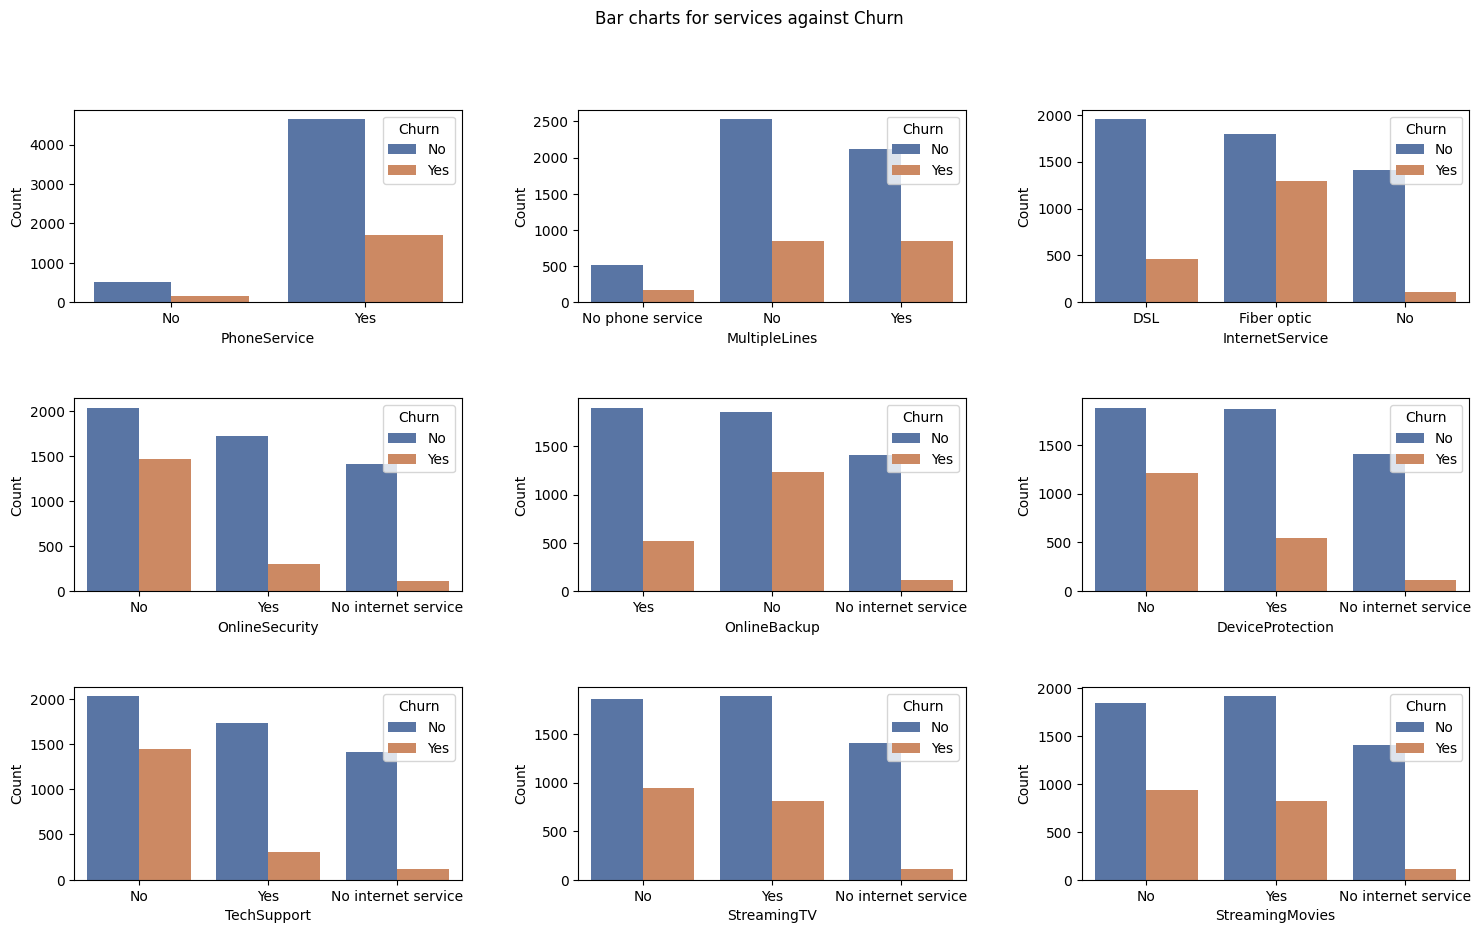

In [382]:
# Define the services to plot
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# Loop through the services and create a bar chart for each
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    # Create a countplot for the service against the Churn column
    sns.countplot(x=service, hue='Churn', data=df, ax=axs[row][col], palette="deep")
    axs[row][col].set_xlabel(service)
    axs[row][col].set_ylabel('Count')
    axs[row][col].legend(title='Churn', loc='upper right')

# Set the title for the entire figure
fig.suptitle('Bar charts for services against Churn')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

* **Customers who use fiber optic are more likely to churn**
* **Customers without online security are more likely to churn**
* **Customers without online backup are more likely to churn**
* **Customers without Tech Support are more likely to churn**
* **Customers without Device Protection are more likely to churn**

In [383]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Are customers on long-term contracts less likely to churn?**

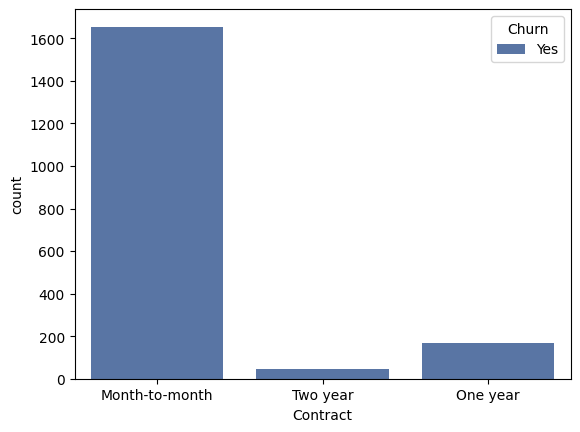

In [384]:
# Create a countplot for the service against the Churn column
sns.countplot(data=df[df['Churn'] == 'Yes'], x= "Contract" , hue='Churn', palette="deep");

#### **It is clear that customers on long-term contracts less likely to churn.**

### **Are there any patterns in the payment methods chosen by customers who have churned?**

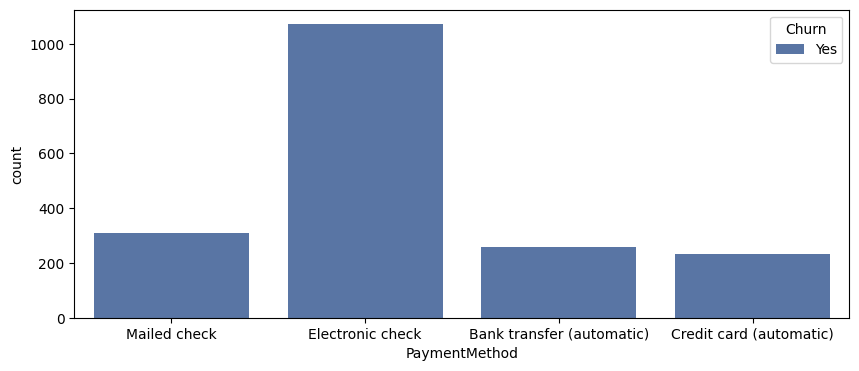

In [385]:
plt.subplots(figsize=(10,4))
sns.countplot(data = df[df['Churn'] == 'Yes'], x = "PaymentMethod", hue = "Churn", palette = "deep");

#### **The churned customers are using Electronic check**

### **Are customers who have been with the company for a longer time less likely to churn?**

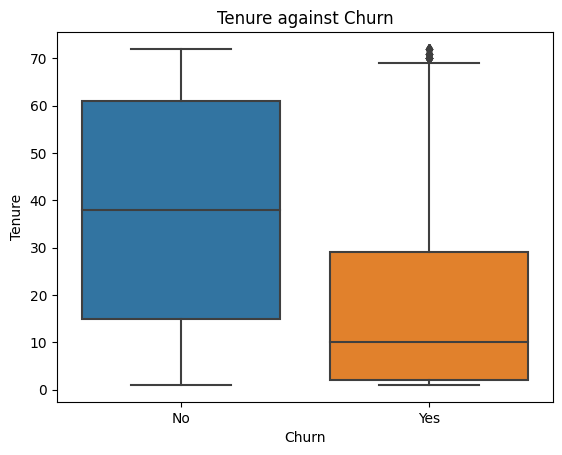

In [386]:
# Create a box plot of a numeric variable across a categorical variable
sns.boxplot(x='Churn', y='tenure', data=df)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure against Churn');


#### **Yes! Older customers are less likely to churn**

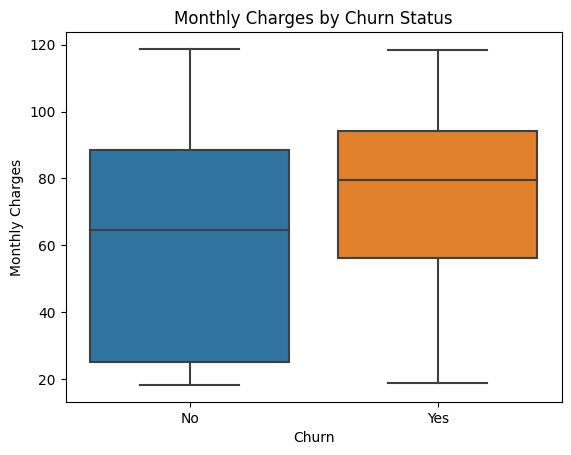

In [387]:
# Create a box plot of monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')
plt.show()


#### **Churned customers paid 60 or more per month.**

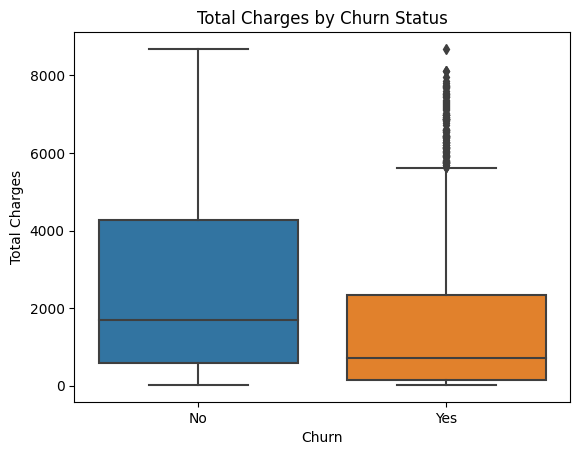

In [388]:
# Create a box plot of Total charges by churn status
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges by Churn Status')
plt.show()


#### **Total charges are not high for churned customers**

<Axes: >

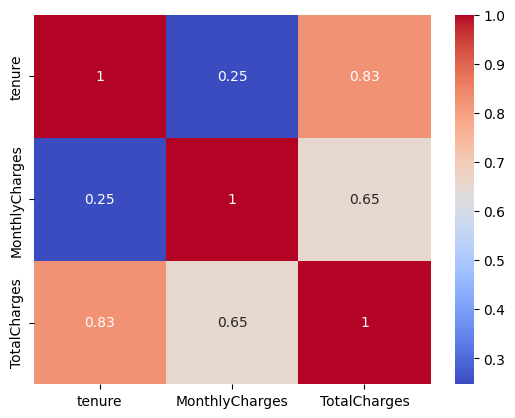

In [389]:
# Select columns for heatmap
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a heatmap using a correlation matrix
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')


In [390]:

k = 1.5

# Apply winsorization to MonthlyCharges, TotalCharges, and Tenure
for col in ["MonthlyCharges", "TotalCharges", "tenure"]:
    # Calculate the IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Apply winsorization to the current column
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    
    # Cap the values outside of the lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


#### **As Expected, total charges and tenure are strongly correlated.**

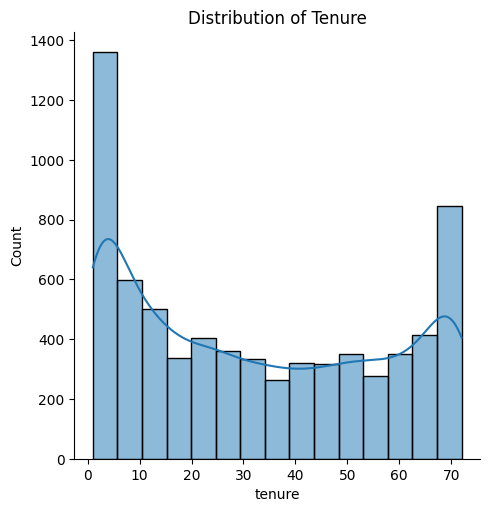

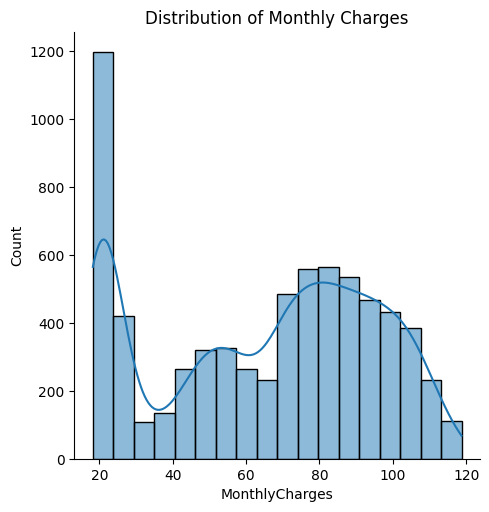

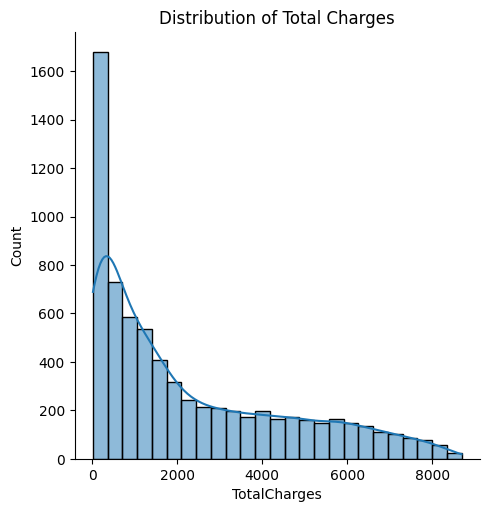

In [391]:
# Create distribution plot for 'tenure'
sns.displot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')

# Create distribution plot for 'MonthlyCharges'
sns.displot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

# Create distribution plot for 'TotalCharges'
sns.displot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.show()


In [392]:
#df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])
#df['TotalCharges'] = np.log1p(df['TotalCharges'])

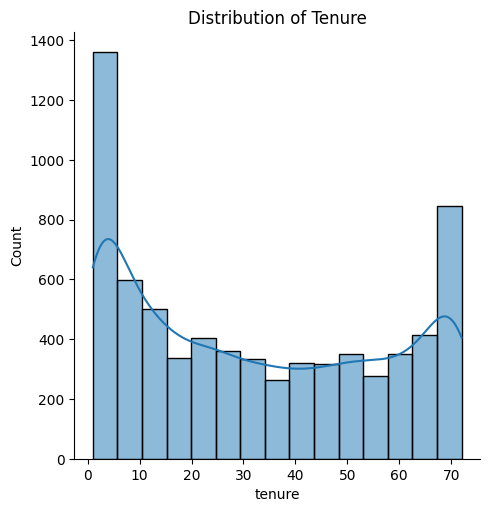

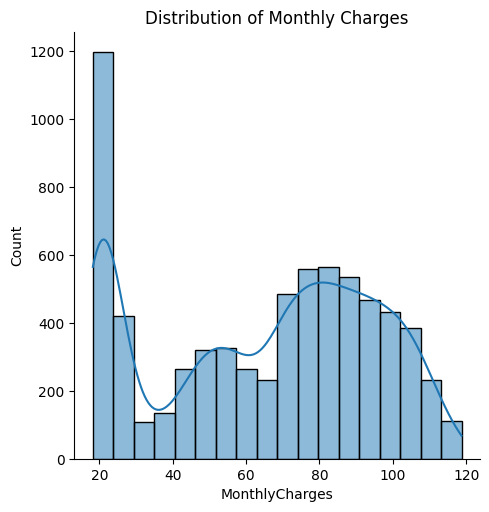

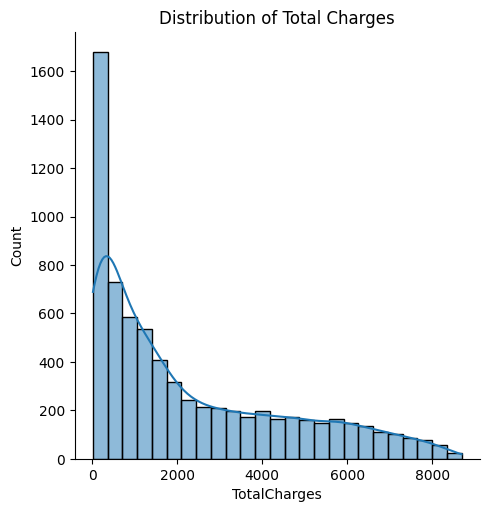

In [393]:
# Create distribution plot for 'tenure'
sns.displot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')

# Create distribution plot for 'MonthlyCharges'
sns.displot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

# Create distribution plot for 'TotalCharges'
sns.displot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.show()


In [394]:
""" features = ['SeniorCitizen', 'Partner', 'Dependents','tenure',  'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'Contract', 
       'PaymentMethod', 'MonthlyCharges'] """

" features = ['SeniorCitizen', 'Partner', 'Dependents','tenure',  'InternetService',\n       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',\n        'Contract', \n       'PaymentMethod', 'MonthlyCharges'] "

In [395]:
# Replace "No" with 0 in the "InternetService" column
df["InternetService"] = df["InternetService"].replace("No", 0)

In [396]:
features = ['SeniorCitizen', 'Partner', 'Dependents','tenure',  'InternetService','Contract', 
            'PaymentMethod', 'MonthlyCharges']

In [397]:
# Replace "Yes" with 1 and "No" with 0 in the 'Partner' and 'Dependents' columns
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})


In [398]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
0              1520
Name: InternetService, dtype: int64

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [400]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1.0,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34.0,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2.0,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45.0,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2.0,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the features and target
features = ['SeniorCitizen', 'Partner','PhoneService', 'Dependents', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges']
target = ["Churn"]

# Select the relevant columns from your DataFrame
data = df[features + target]

# Perform one-hot encoding on categorical features
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], prefix=['InternetService', 'Contract', 'PaymentMethod'])

# Split the data into features and target
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% train, 20% validation, 20% test

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create and train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


# Make predictions on the validation set
y_val_pred_logistic = logistic_model.predict(X_val)

accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)
report_logistic = classification_report(y_val, y_val_pred_logistic)



print("Logistic Regression - Accuracy:", accuracy_logistic)
print("Logistic Regression - Classification Report:")
print(report_logistic)



Logistic Regression - Accuracy: 0.7945984363894811
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1020
           1       0.65      0.55      0.59       387

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [402]:
import joblib

# Save the logistic model to a file
joblib.dump(logistic_model, 'logistic_model.pkl')


['logistic_model.pkl']

# **Recommendations**
* ###  **Make some offers to customers without partners and customers without Dependents.**


* ###  **Provide better online security, online backup, tech support, and device protection.**


* ###  **Encourage customers to switch to long-term contracts by discounts.**


* ###  **Consider offering alternative payment methods to electronic checks.**


* ###  **Develop marketing strategies to attract senior citizens..**


* ###  **Improve the quality of the fiber optic service.** 
